## Who owns corporate America
`You are going to work with some data that we used to show that passive investors own corporate America`

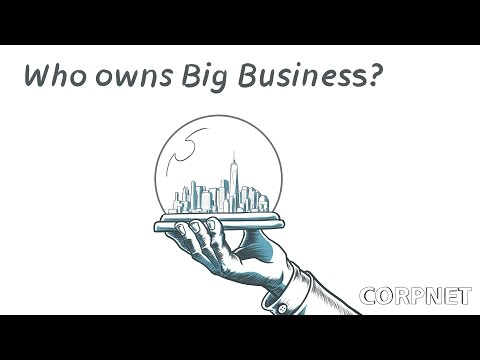

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('OYpCxXuF3M8')

`I modified a bit the data, changing encodings, adding several variables in the same column and splitting it into several datasets. You'll need to fix it`
- `The first one (company_data.csv) has information on the company name, the company ID, the percentage of ownership of the Big 3 passive investors (Big3Share), their rank as shareholders (position, 1 = largest shareholder) and some financials.`
- `The second one (employees.csv) has information on the company ID and the number of employees`

`You'll replicate some figures from the paper, and will create some new one`

In [1]:
#Imports needed
import pandas as pd
import pylab as plt
import seaborn as sns
import numpy as np


%matplotlib inline

## 1. Read file "data/company_data.csv" (beware the encoding) and print header

In [2]:
df = pd.read_csv("data/company_data.csv",encoding="iso-8859-1",sep="\t")
df.head()

,Company_name,Company_ID,Big3Share,Position,Exchange,TypeEnt,VAR,Dollars_th
0,INVESCO LTD,BM40671R,17.85,1,New York Stock Exchange (NYSE),Bank,Revenue,$7500000.0
1,ROYAL CARIBBEAN CRUISES LTD,LR30002MX,14.32,3,New York Stock Exchange (NYSE),Industrial company,Revenue,$7500000.0
2,GENCO SHIPPING & TRADING LTD,MH30004AQ,0.14,31,New York Stock Exchange (NYSE),Industrial company,Revenue,$350000.0
3,EAGLE BULK SHIPPING INC,MH40003AQ,2.85,9,NASDAQ National Market,Industrial company,Revenue,$350000.0
4,POWERSHARES DB US DOLLAR INDEX BEARISH,US*S00100679,0.00,101,NYSE ARCA,Industrial company,Revenue,NaN


## 2. Describe the dataset, print the dtypes and fix the problem with the dollar symbol

In [4]:
#Use df.describe() to see how it looks like. Why is dollars_th not there? (describe only describes numeric columns)
df.describe()

,Big3Share,Position
count,11646.000000,11646.000000
mean,10.323029,16.122875
std,7.950457,34.873495
min,0.000000,1.000000
25%,2.420000,1.000000
50%,10.365000,2.000000
75%,17.200000,8.000000
max,48.190000,165.000000


In [5]:
#Print types (object => strings)
df.dtypes

Company_name     object
Company_ID       object
Big3Share       float64
Position          int64
Exchange         object
TypeEnt          object
VAR              object
Dollars_th       object
dtype: object

In [6]:
#Use df["Dollars_th"].str.slice() to delete the first character
df["Dollars_th"] = df["Dollars_th"].str.slice(1,None)#None is optional

#Convert to type float
df["Dollars_th"] = df["Dollars_th"].astype(float)

## 3. Tidy the table (pivot or melt)

In [7]:
##Pivot or Melt to tidy format
#Columns already present
variables_already_present = ["Company_name","Company_ID","Big3Share","Position","Exchange","TypeEnt"]

#Column with the variables
column_to_split = ["VAR"]

#Column with the values
column_with_values = "Dollars_th"

#Fix
df_fixed = df.pivot_table(column_with_values,
               variables_already_present,
               column_to_split).reset_index()

df_fixed.head()

VAR,Company_name,Company_ID,Big3Share,Position,Exchange,TypeEnt,Assets,MarketCap,Revenue
0,"1-800 FLOWERS.COM, INC.",US113117311,5.08,4,NASDAQ National Market,Industrial company,497073.0,289266.0,1121506.0
1,1347 PROPERTY INSURANCE HOLDINGS INC,US257638358L,0.00,120,NASDAQ National Market,Insurance company,NaN,42390.0,37500.0
2,"1ST CENTURY BANCSHARES, INC.",US261169687,0.00,122,NASDAQ National Market,Bank,64927.0,115050.0,2585.0
3,1ST CONSTITUTION BANCORP,US223665653,0.59,15,NASDAQ National Market,Bank,NaN,99595.0,37500.0
4,1ST SOURCE CORPORATION,US351068133,6.78,4,NASDAQ National Market,Bank,5187916.0,884045.0,249837.0


## 4. Read the dataset employees.csv and merge with the ohter

In [8]:
#Read the other dataset
df_emp = pd.read_csv("data/employees.csv",sep="\t")
df_emp.head()

,Company_ID,Employees
0,BM40671R,7500.0
1,LR30002MX,7500.0
2,MH30004AQ,1500.0
3,MH40003AQ,750.0
4,US*S00100679,NaN


In [9]:
#Merge the datafiles
df_merged = pd.merge(df_emp,df_fixed)
df_merged.head()

,Company_ID,Employees,Company_name,Big3Share,Position,Exchange,TypeEnt,Assets,MarketCap,Revenue
0,BM40671R,7500.0,INVESCO LTD,17.85,1,New York Stock Exchange (NYSE),Bank,NaN,13123024.0,7500000.0
1,LR30002MX,7500.0,ROYAL CARIBBEAN CRUISES LTD,14.32,3,New York Stock Exchange (NYSE),Industrial company,NaN,16739323.0,7500000.0
2,MH30004AQ,1500.0,GENCO SHIPPING & TRADING LTD,0.14,31,New York Stock Exchange (NYSE),Industrial company,NaN,43392.0,350000.0
3,MH40003AQ,750.0,EAGLE BULK SHIPPING INC,2.85,9,NASDAQ National Market,Industrial company,NaN,26674.0,350000.0
4,US*S00100679,NaN,POWERSHARES DB US DOLLAR INDEX BEARISH,0.00,101,NYSE ARCA,Industrial company,NaN,44120.0,NaN


## 5. Replicate figures similar to the ones in the paper
- The variable "Position" ranks the position of the Big3 among the investors of the company. Use pd.cut to create four categories: Big3 as largest shareholder (position 1). Big3 as second largest shareholder (position 2). Big3 as third largest shareholder (position 3). Big3 not one of the third largest shareholder (position 4 to end)
- Plot the average ownership by category
- Plot the sum of market capitalization by category
- Plot the normalized sum of market capitalization by category

Control the aesthetics of the plot, make the figure of a nice size, delete the edges of the bars and despine the figure (sns.despine())

In [10]:
#Create the variable described above
df_merged["Cat_Big3"] = pd.cut(df_merged["Position"],[0,1,2,3,100])

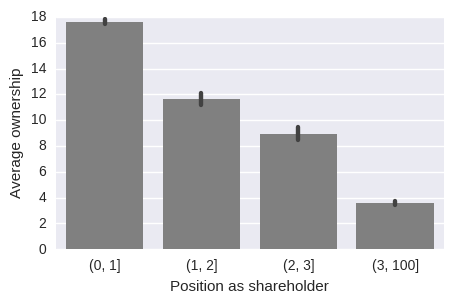

In [11]:
#Plot the average onwership (Big3Share) for each of the 4 categories (barplot, boxplot or violinplot). 
#Use the same color for all bars and fix the labels
plt.figure(figsize=(5,3))
sns.barplot(x="Cat_Big3",y="Big3Share",data=df_merged,color="gray",edgecolor="none")
plt.xlabel("Position as shareholder")
plt.ylabel("Average ownership")
sns.despine()

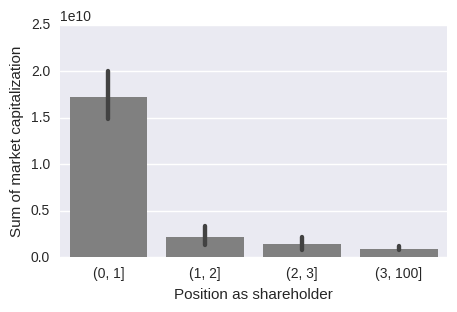

In [12]:
#Plot the sum of market capitalization (MarketCap) for each of the 4 categories (barplot)
#Use the same color for all bars and fix the labels
plt.figure(figsize=(5,3))
sns.barplot(x="Cat_Big3",y="MarketCap",data=df_merged,color="gray",estimator=sum,edgecolor="none")
plt.xlabel("Position as shareholder")
plt.ylabel("Sum of market capitalization")
sns.despine()

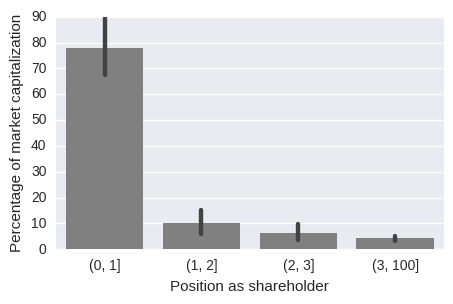

In [13]:
#Create a variable with the normalized market capitalization that sums up to 100
df_merged["MarketCap_Sum100"] = 100*df_merged["MarketCap"]/np.sum(df_merged["MarketCap"])

#Redo the plot
plt.figure(figsize=(5,3))
sns.barplot(x="Cat_Big3",y="MarketCap_Sum100",data=df_merged,color="gray",estimator=sum,edgecolor="none")
plt.xlabel("Position as shareholder")
plt.ylabel("Percentage of market capitalization")
sns.despine()

## 6. Transform financials into log scale and plot distributions

In [14]:
#Transform financial variables to log
df_merged["log_Employees"] = np.log10(df_merged["Employees"])
df_merged["log_Revenue"] = np.log10(df_merged["Revenue"])
df_merged["log_Assets"] = np.log10(df_merged["Assets"])
df_merged["log_MarketCap"] = np.log10(df_merged["MarketCap"])

#Delete infinite values (they occur when you take the logarithm of zero) and drop missing values in any row
df_merged = df_merged.replace([np.inf,-np.inf],np.nan).dropna()

/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


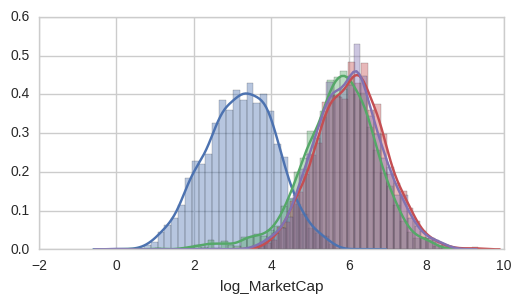

In [22]:
#Make histograms (sns.distplot) for all variables. 
#Try both hist=True (default) and hist=False to see the difference
plt.figure(figsize=(6,3)
sns.distplot(df_merged["log_Employees"].dropna(),hist=False,label='emp')
sns.distplot(df_merged["log_Revenue"].dropna(),hist=False,label="rev")
sns.distplot(df_merged["log_Assets"].dropna(),hist=False,label="assets")
sns.distplot(df_merged["log_MarketCap"].dropna(),hist=False,label="mark")

## 7. Make some plots to visualize how assets, market capitalization and employees correlate for different types of companies



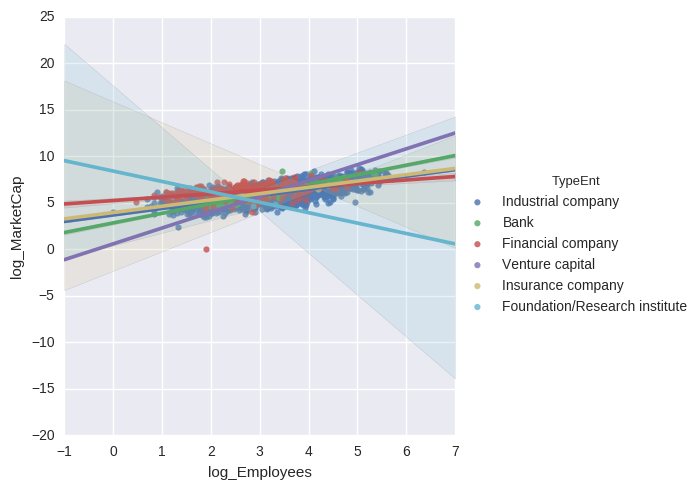

In [16]:
#Make a scatter plot of x = assets and y = market capitalization with hue = TypeEnt
#It'll be too cluttered
sns.lmplot(x="log_Employees",y="log_MarketCap",hue="TypeEnt",data=df_merged,truncate=True)

## Keep a subset of the data with banks and industrial companies and do the plot again
- This time change labels
- Make white background (controlling aesthetics): http://seaborn.pydata.org/tutorial/aesthetics.html
- Use the argument aspect to have golden ratio
- Use xlim and ylim
- Make the dots a bit smaller and a bit transparent
- Save the ifugre (pdf)

In [17]:
#Keep a subset of the data with banks and industrial companies
df_bank_industr = df_merged.loc[df_merged["TypeEnt"].isin(["Bank","Industrial company"])]
df_bank_industr.head()

,Company_ID,Employees,Company_name,Big3Share,Position,Exchange,TypeEnt,Assets,MarketCap,Revenue,Cat_Big3,MarketCap_Sum100,log_Employees,log_Revenue,log_Assets,log_MarketCap
24,US010355758,107.0,"TELIGENT, INC.",9.75,3,NASDAQ National Market,Industrial company,184762.0,307744.0,44250.0,"(2, 3]",0.001389,2.029384,4.645913,5.266613,5.488190
26,US010393663,221.0,BAR HARBOR BANKSHARES,7.22,1,NYSE MKT,Bank,1580055.0,203279.0,53863.0,"(0, 1]",0.000918,2.344392,4.731291,6.198672,5.308093
27,US010393723,6800.0,IDEXX LABORATORIES INC,17.10,1,NASDAQ National Market,Industrial company,1474993.0,8064073.0,1601892.0,"(0, 1]",0.036402,3.832509,6.204633,6.168790,6.906554
28,US010404322,218.0,"FIRST BANCORP, INC (THE)",9.56,1,NASDAQ National Market,Bank,1559660.0,216066.0,53162.0,"(0, 1]",0.000975,2.338456,4.725601,6.193030,5.334586
29,US010413282,652.0,CAMDEN NATIONAL CORPORATION,9.34,1,NASDAQ National Market,Bank,3709871.0,441700.0,111443.0,"(0, 1]",0.001994,2.814248,5.047053,6.569359,5.645127


In [18]:
#White background
sns.set_style("whitegrid")

(3, 9)

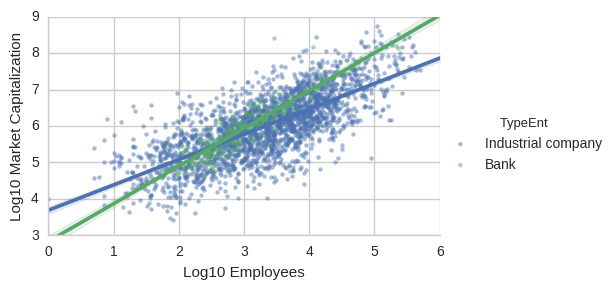

In [19]:
#Make a scatter plot of x = assets and y = market capitalization with hue = Type of ent
sns.lmplot(x="log_Employees",y="log_MarketCap",hue="TypeEnt",data=df_bank_industr,size=3,aspect=1.6,
           scatter_kws={"s":10,"alpha":0.5}
          )
plt.xlabel("Log10 Employees")
plt.ylabel("Log10 Market Capitalization")
plt.xlim(0,6)
plt.ylim(3,9)

## Use the same subset of companies to plot log of assets versus log of market capitalization

(3, 9)

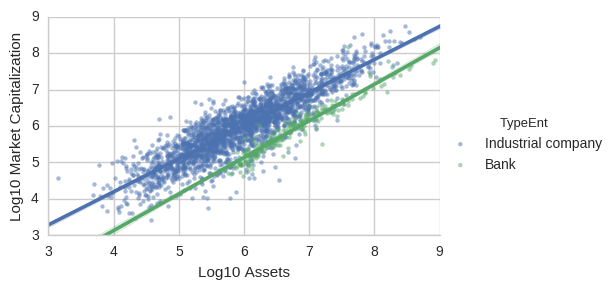

In [20]:
#Make a scatter plot of x = assets and y = market capitalization with hue = Type of ent
sns.lmplot(x="log_Assets",y="log_MarketCap",hue="TypeEnt",data=df_bank_industr,size=3,aspect=1.6,
           scatter_kws={"s":10,"alpha":0.5}
          )
plt.xlabel("Log10 Assets")
plt.ylabel("Log10 Market Capitalization")
plt.xlim(3,9)
plt.ylim(3,9)